In [ ]:
!pip install git+https://github.com/PiotMik/quantutils.git

In [2]:
from quantutils.models.interest_rates import merton, vasicek
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (10, 5)

## Option pricing

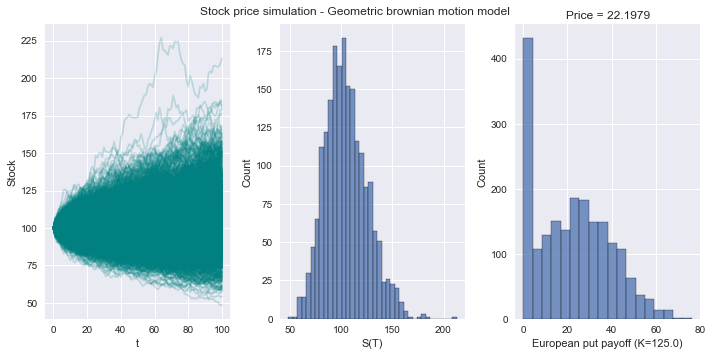

In [4]:
from quantutils.models.stock_prices import gbm
import numpy as np
n_steps = 10000
xt = gbm(s0=100,
         r=0.05,
         sigma=0.2,
         t=1.0,
         time_steps=100,
         n_paths=2000)

fig, ax = plt.subplots(1, 3)
ax[0].plot(xt, color='teal', alpha = .2)
ax[0].set_xlabel("t")
ax[0].set_ylabel("Stock")

sns.histplot(xt[-1, :], ax= ax[1])
ax[1].set_xlabel('S(T)')

K = 125.
payoffs = np.maximum(K - xt[-1, :], 0)
sns.histplot(payoffs, ax= ax[2])
ax[2].set_xlabel(f'European put payoff ({K=})')
ax[2].set_title(f'Price = {payoffs.mean():.4f}')

plt.tight_layout()
_ = plt.suptitle("Stock price simulation - Geometric brownian motion model ")